In [53]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
datasets = pd.read_excel('covid.xls')


In [3]:
datasets.head()

,id,age,sex,diabetes,hypertension,cvd,copd,cancer,renal,ace,...,ageclass,ageclass1,ageclass2,ageclass3,ageclass4,ageclass5,ageclass6,ageclass7,severe,death
0,1,64.194389,0,0,0,0,0,0,0,0,...,69.989998,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0
1,2,76.917183,1,0,1,1,0,0,0,0,...,79.989998,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1
2,3,23.460644,0,0,0,0,0,0,0,0,...,39.990002,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0
3,4,30.447639,0,0,0,0,0,0,0,0,...,39.990002,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0
4,5,55.299110,1,0,0,0,0,0,0,0,...,59.990002,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0


In [4]:
datasets.columns

Index(['id', 'age', 'sex', 'diabetes', 'hypertension', 'cvd', 'copd', 'cancer',
       'renal', 'ace', 'arbs', 'acearbs', 'covidseverity', 'verysevere',
       'ageclass', 'ageclass1', 'ageclass2', 'ageclass3', 'ageclass4',
       'ageclass5', 'ageclass6', 'ageclass7', 'severe', 'death'],
      dtype='object')

In [5]:
datasets.drop(['id', 'age', 'sex', 'diabetes', 'hypertension', 'cvd', 'copd', 'cancer',
       'renal', 'ace', 'arbs', 'acearbs', 'ageclass', 'ageclass1', 'ageclass2', 'ageclass3', 'ageclass4',
       'ageclass5', 'ageclass6', 'ageclass7', 'severe'], axis=1)

,covidseverity,verysevere,death
0,0,0,0
1,2,1,1
2,0,0,0
3,0,0,0
4,1,0,0
...,...,...,...
1598,1,0,0
1599,0,0,0
1600,0,0,0
1601,0,0,0


In [6]:
datasets['death']=datasets['death'].map({True:'Dead',False:'Alive'})

In [7]:
datasets.head()

,id,age,sex,diabetes,hypertension,cvd,copd,cancer,renal,ace,...,ageclass,ageclass1,ageclass2,ageclass3,ageclass4,ageclass5,ageclass6,ageclass7,severe,death
0,1,64.194389,0,0,0,0,0,0,0,0,...,69.989998,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,Alive
1,2,76.917183,1,0,1,1,0,0,0,0,...,79.989998,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,Dead
2,3,23.460644,0,0,0,0,0,0,0,0,...,39.990002,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,Alive
3,4,30.447639,0,0,0,0,0,0,0,0,...,39.990002,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,Alive
4,5,55.299110,1,0,0,0,0,0,0,0,...,59.990002,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,Alive


In [8]:
datasets.covidseverity

0       0
1       2
2       0
3       0
4       1
       ..
1598    1
1599    0
1600    0
1601    0
1602    0
Name: covidseverity, Length: 1603, dtype: int64

In [16]:
X=datasets.loc[:,['covidseverity','verysevere']].values

In [17]:
Y = datasets.iloc[:, -1].values

In [18]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [19]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

In [20]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [21]:
classifier=xgboost.XGBClassifier()

In [22]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=2,verbose=3)

In [23]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X,Y)
timer(start_time) # timing ends here for "start_time" variable

Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    6.0s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    6.0s finished
C:\xampp1\anaconda\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:01:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 0 minutes and 6.63 seconds.


In [24]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=8,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [25]:
random_search.best_params_

{'min_child_weight': 7,
 'max_depth': 8,
 'learning_rate': 0.2,
 'gamma': 0.3,
 'colsample_bytree': 0.7}

In [69]:
X=datasets.loc[:,['covidseverity','verysevere']].values

In [70]:
Y = datasets.iloc[:, -1].values

In [71]:
Y

array(['Alive', 'Dead', 'Alive', ..., 'Alive', 'Alive', 'Alive'],
      dtype=object)

In [72]:
X.shape

(1603, 2)

In [73]:
Y.shape

(1603,)

In [26]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.25, random_state = 0)


In [27]:
X_Test

array([[1, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 0],
       [1, 0],
       [0, 0],
       [2, 1],
       [0, 0],
       [1, 0],
       [1, 0],
       [0, 0],
       [0, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 0],
       [1, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [2, 1],
       [2, 1],
       [1, 0],
       [0, 0],
       [2, 1],
       [0, 0],
       [1, 0],
       [0, 0],
       [1, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [2, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [2, 1],
       [0, 0],
       [2, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [2, 1],
       [0, 0],
       [0, 0],
       [2, 1],
       [1, 0],
       [0, 0],
       [1, 0],
       [0,

In [28]:
Y_Test

array(['Alive', 'Alive', 'Alive', 'Alive', 'Alive', 'Alive', 'Alive',
       'Dead', 'Alive', 'Alive', 'Alive', 'Alive', 'Alive', 'Alive',
       'Alive', 'Alive', 'Alive', 'Alive', 'Alive', 'Alive', 'Alive',
       'Dead', 'Alive', 'Alive', 'Alive', 'Alive', 'Alive', 'Alive',
       'Alive', 'Alive', 'Alive', 'Alive', 'Alive', 'Alive', 'Alive',
       'Alive', 'Alive', 'Alive', 'Alive', 'Alive', 'Alive', 'Alive',
       'Alive', 'Alive', 'Alive', 'Alive', 'Alive', 'Alive', 'Dead',
       'Alive', 'Dead', 'Alive', 'Alive', 'Alive', 'Alive', 'Alive',
       'Alive', 'Alive', 'Alive', 'Alive', 'Alive', 'Alive', 'Alive',
       'Alive', 'Alive', 'Alive', 'Alive', 'Alive', 'Alive', 'Alive',
       'Dead', 'Alive', 'Alive', 'Alive', 'Alive', 'Alive', 'Alive',
       'Alive', 'Alive', 'Alive', 'Alive', 'Alive', 'Alive', 'Alive',
       'Alive', 'Dead', 'Alive', 'Alive', 'Alive', 'Alive', 'Alive',
       'Alive', 'Alive', 'Alive', 'Alive', 'Alive', 'Alive', 'Alive',
       'Alive', 'Alive', '

In [43]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=8,
              min_child_weight=7, missing=None, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [44]:
classifier.fit(X_Train, Y_Train)

[18:13:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\xampp1\anaconda\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=8,
              min_child_weight=7, missing=None, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [54]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
param = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
             }
print(param)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8]}


In [29]:
from sklearn.ensemble import GradientBoostingClassifier

In [60]:
clf = GradientBoostingClassifier(loss='exponential',n_estimators=100,learning_rate=0.2, max_depth=8, random_state=0).fit(X_Train, Y_Train)
clf.score(X_Test, Y_Test)

0.9750623441396509

In [31]:
clf

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=1.0, loss='deviance', max_depth=1,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [32]:
clf.score(X_Test, Y_Test)

0.9750623441396509

In [33]:
clf.predict([[2,1]])[0]

'Dead'

In [34]:
y_pred=clf.predict(X_Test)

In [35]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(Y_Test, y_pred) 
cm

array([[354,  10],
       [  0,  37]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix')

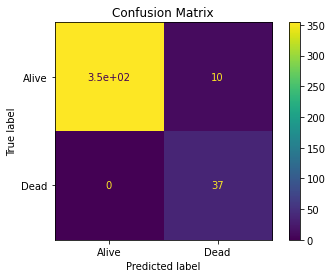

In [36]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf,X_Test,Y_Test)
plt.title('Confusion Matrix')

In [ ]:

import joblib
joblib.dump(logistic_model,"iris_model.sav")